<a href="https://www.kaggle.com/code/fauziya24/sentimental-analysis-visualizations?scriptVersionId=172157792" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---------------------------------------------------------------------------------

## Analyzing Sentiment in Badminton Tweets

In this analysis, we explore the sentiments expressed in tweets related to the Thomas Cup 2022, a prestigious badminton championship. The dataset used contains a total of 9704 tweets and includes various attributes such as tweet text, username, hashtags, timestamps, and more.

### Data Preparation and Exploration

We begin by importing the necessary libraries such as Pandas, NumPy, Matplotlib, Seaborn, and TextBlob for data manipulation, visualization, and sentiment analysis. Additionally, we load the dataset and examine its shape, columns, and data types to gain a better understanding.

After preprocessing the data, including converting data types and handling missing values, we proceed to analyze the sentiment of each tweet using TextBlob. The sentiment analysis categorizes tweets as positive, negative, or neutral based on the polarity of the text.

### Sentiment Analysis and Visualization

We visualize the distribution of sentiments across all tweets using count plots, pie charts, and bar charts. These visualizations provide insights into the overall sentiment trends among Twitter users discussing the Thomas Cup 2022.

Furthermore, we delve deeper into the sentiment analysis by generating word clouds for the overall tweets, positive tweets, and negative tweets. These word clouds highlight the most frequent words used in each sentiment category, offering valuable insights into the prevailing topics and discussions.

### Additional Analysis

To gain further insights, we explore various aspects such as tweet length distribution, sentiment scores, and their correlation with retweet counts. Visualizations including histograms, box plots, violin plots, and scatter plots are utilized to illustrate these relationships effectively.

### Conclusion

In conclusion, this analysis offers a comprehensive overview of sentiment trends in tweets related to the Thomas Cup 2022. By leveraging sentiment analysis and data visualization techniques, we uncover valuable insights that can inform stakeholders about the prevailing sentiments and topics of discussion surrounding this badminton championship.

---------------------------------------------------------------------------------

In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

from textblob import TextBlob

In [3]:
df = pd.read_csv('/kaggle/input/thomas-cup-2022-badminton-tweets/thomascup_2022_tweets.csv')
df

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1529235395812155392,"India has won the Thomas cup, @nikhat_zareen ...",themohanty_,"['India', 'IndianEra']",2022-05-24 22:58:24+00:00,43,0,0,3,0,en,NaN,NaN,NaN,"India has won the Thomas cup, @nikhat_zareen ..."
1,1528224948111941633,PM’s interaction with Thomas Cup Champions is ...,goikarpk,"['India', 'ThomasCup']",2022-05-22 04:03:15+00:00,51,0,0,1,0,en,NaN,NaN,NaN,PM’s interaction with Thomas Cup Champions is ...
2,1527216966171144193,India won maiden Thomas Cup after defeating 14...,BeShararat,"['ThomasCup', 'India', 'ThomasUberCup2022']",2022-05-19 09:17:53+00:00,4,0,1,1,0,en,NaN,NaN,NaN,India won maiden Thomas Cup after defeating 14...
3,1526912239910785024,#India's bunch of exceptionally proficient #Ba...,aaiprayagraj,"['India', 'Badminton', 'ThomasCup2022', 'Bangk...",2022-05-18 13:07:01+00:00,1553,0,1,1,0,en,NaN,NaN,NaN,#India's bunch of exceptionally proficient #Ba...
4,1526893293136924672,#India's bunch of exceptionally proficient #Ba...,aaisapairport,"['India', 'Badminton', 'ThomasCup2022', 'Bangk...",2022-05-18 11:51:44+00:00,1192,0,0,0,0,en,NaN,NaN,NaN,#India's bunch of exceptionally proficient #Ba...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9699,1522369741914279936,bismillah bulan mei bulan baik untuk indonesia...,bellydupling,NaN,2022-05-06 00:16:45+00:00,267,0,0,0,0,in,NaN,NaN,NaN,bismillah bulan mei bulan baik untuk indonesia...
9700,1509849585992159239,@BAI_Media @bwfmedia @Media_SAI @IndiaSports @...,atul_tn,NaN,2022-04-01 11:06:07+00:00,40,0,0,4,0,en,NaN,1.509823e+18,https://twitter.com/BAI_Media,@BAI_Media @bwfmedia @Media_SAI @IndiaSports @...
9701,1505009552281903106,"@badminton__fess Asian games, Sea games, turma...",Nda1426,NaN,2022-03-19 02:33:33+00:00,97,0,0,0,0,in,NaN,1.505007e+18,https://twitter.com/badminton__fess,"@badminton__fess Asian games, Sea games, turma..."
9702,1485192823679119361,Blf! Guys ada yg punya foto di zi jian/wang ch...,badminton__fess,NaN,2022-01-23 10:08:57+00:00,29259,0,0,8,0,in,NaN,NaN,NaN,Blf! Guys ada yg punya foto di zi jian/wang ch...


In [4]:
df.shape


(9704, 15)

In [5]:
df.columns


Index(['id', 'text', 'username', 'hashtags', 'created_at',
       'user followers count', 'replycount', 'retweetcount', 'likecount',
       'quotecount', 'language', 'quotedtweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9704 non-null   int64  
 1   text                  9704 non-null   object 
 2   username              9704 non-null   object 
 3   hashtags              9680 non-null   object 
 4   created_at            9704 non-null   object 
 5   user followers count  9704 non-null   int64  
 6   replycount            9704 non-null   int64  
 7   retweetcount          9704 non-null   int64  
 8   likecount             9704 non-null   int64  
 9   quotecount            9704 non-null   int64  
 10  language              9704 non-null   object 
 11  quotedtweet           0 non-null      float64
 12  inReplyToTweetId      1174 non-null   float64
 13  inReplyToUser         1174 non-null   object 
 14  mentionedUsers        9704 non-null   object 
dtypes: float64(2), int64(

In [7]:
df['text'] = df['text'].astype('string')
df['username'] = df['username'].astype('string')
df['hashtags'] = df['hashtags'].astype('string')
df['created_at'] = pd.to_datetime(df['created_at'])
df['language'] = df['language'].astype('string')
df['quotedtweet'] = df['quotedtweet'].astype('string')
df['inReplyToUser'] = df['inReplyToUser'].astype('string')
df['mentionedUsers'] = df['text'].astype('string')

In [8]:
df.dtypes

id                                    int64
text                         string[python]
username                     string[python]
hashtags                     string[python]
created_at              datetime64[ns, UTC]
user followers count                  int64
replycount                            int64
retweetcount                          int64
likecount                             int64
quotecount                            int64
language                     string[python]
quotedtweet                  string[python]
inReplyToTweetId                    float64
inReplyToUser                string[python]
mentionedUsers               string[python]
dtype: object

In [9]:
df.describe()


,id,user followers count,replycount,retweetcount,likecount,quotecount,inReplyToTweetId
count,9.704000e+03,9.704000e+03,9704.000000,9704.000000,9704.000000,9704.000000,1.174000e+03
mean,1.525416e+18,2.976977e+04,2.629534,4.743714,41.826154,1.114695,1.525281e+18
std,1.543448e+15,3.719312e+05,31.663891,65.120010,565.075728,19.098370,3.082754e+15
min,1.477541e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.473159e+18
25%,1.525150e+18,4.200000e+01,0.000000,0.000000,0.000000,0.000000,1.525163e+18
50%,1.525775e+18,2.010000e+02,0.000000,0.000000,0.000000,0.000000,1.525770e+18
75%,1.525784e+18,7.280000e+02,0.000000,0.000000,2.000000,0.000000,1.525783e+18
max,1.538481e+18,1.442951e+07,1499.000000,2724.000000,31080.000000,841.000000,1.538479e+18


In [10]:
df.drop(columns=['quotedtweet'],inplace=True)


In [11]:
df

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1529235395812155392,"India has won the Thomas cup, @nikhat_zareen ...",themohanty_,"['India', 'IndianEra']",2022-05-24 22:58:24+00:00,43,0,0,3,0,en,NaN,<NA>,"India has won the Thomas cup, @nikhat_zareen ..."
1,1528224948111941633,PM’s interaction with Thomas Cup Champions is ...,goikarpk,"['India', 'ThomasCup']",2022-05-22 04:03:15+00:00,51,0,0,1,0,en,NaN,<NA>,PM’s interaction with Thomas Cup Champions is ...
2,1527216966171144193,India won maiden Thomas Cup after defeating 14...,BeShararat,"['ThomasCup', 'India', 'ThomasUberCup2022']",2022-05-19 09:17:53+00:00,4,0,1,1,0,en,NaN,<NA>,India won maiden Thomas Cup after defeating 14...
3,1526912239910785024,#India's bunch of exceptionally proficient #Ba...,aaiprayagraj,"['India', 'Badminton', 'ThomasCup2022', 'Bangk...",2022-05-18 13:07:01+00:00,1553,0,1,1,0,en,NaN,<NA>,#India's bunch of exceptionally proficient #Ba...
4,1526893293136924672,#India's bunch of exceptionally proficient #Ba...,aaisapairport,"['India', 'Badminton', 'ThomasCup2022', 'Bangk...",2022-05-18 11:51:44+00:00,1192,0,0,0,0,en,NaN,<NA>,#India's bunch of exceptionally proficient #Ba...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9699,1522369741914279936,bismillah bulan mei bulan baik untuk indonesia...,bellydupling,<NA>,2022-05-06 00:16:45+00:00,267,0,0,0,0,in,NaN,<NA>,bismillah bulan mei bulan baik untuk indonesia...
9700,1509849585992159239,@BAI_Media @bwfmedia @Media_SAI @IndiaSports @...,atul_tn,<NA>,2022-04-01 11:06:07+00:00,40,0,0,4,0,en,1.509823e+18,https://twitter.com/BAI_Media,@BAI_Media @bwfmedia @Media_SAI @IndiaSports @...
9701,1505009552281903106,"@badminton__fess Asian games, Sea games, turma...",Nda1426,<NA>,2022-03-19 02:33:33+00:00,97,0,0,0,0,in,1.505007e+18,https://twitter.com/badminton__fess,"@badminton__fess Asian games, Sea games, turma..."
9702,1485192823679119361,Blf! Guys ada yg punya foto di zi jian/wang ch...,badminton__fess,<NA>,2022-01-23 10:08:57+00:00,29259,0,0,8,0,in,NaN,<NA>,Blf! Guys ada yg punya foto di zi jian/wang ch...


In [12]:
def missing_data(data):
    total_count = df.isnull().sum()
    percentage = (df.isnull().sum()/df.isnull().count()*100)
    concat = pd.concat([total_count, percentage], axis=1, keys=['Total', 'Percentage'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    concat['Types'] = types
    return(np.transpose(concat))

In [13]:
missing_data(df)


,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,inReplyToTweetId,inReplyToUser,mentionedUsers
Total,0,0,0,24,0,0,0,0,0,0,0,8530,8530,0
Percentage,0.0,0.0,0.0,0.247321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.901896,87.901896,0.0
Types,int64,string,string,string,"datetime64[ns, UTC]",int64,int64,int64,int64,int64,string,float64,string,string


In [14]:
# Function to perform sentiment analysis
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
# Apply sentiment analysis to each tweet if the 'Sentiment' column is not provided
if 'Sentiment' not in df.columns:
    df['Sentiment'] = df['text'].apply(analyze_sentiment)


In [15]:
df

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,inReplyToTweetId,inReplyToUser,mentionedUsers,Sentiment
0,1529235395812155392,"India has won the Thomas cup, @nikhat_zareen ...",themohanty_,"['India', 'IndianEra']",2022-05-24 22:58:24+00:00,43,0,0,3,0,en,NaN,<NA>,"India has won the Thomas cup, @nikhat_zareen ...",Negative
1,1528224948111941633,PM’s interaction with Thomas Cup Champions is ...,goikarpk,"['India', 'ThomasCup']",2022-05-22 04:03:15+00:00,51,0,0,1,0,en,NaN,<NA>,PM’s interaction with Thomas Cup Champions is ...,Positive
2,1527216966171144193,India won maiden Thomas Cup after defeating 14...,BeShararat,"['ThomasCup', 'India', 'ThomasUberCup2022']",2022-05-19 09:17:53+00:00,4,0,1,1,0,en,NaN,<NA>,India won maiden Thomas Cup after defeating 14...,Positive
3,1526912239910785024,#India's bunch of exceptionally proficient #Ba...,aaiprayagraj,"['India', 'Badminton', 'ThomasCup2022', 'Bangk...",2022-05-18 13:07:01+00:00,1553,0,1,1,0,en,NaN,<NA>,#India's bunch of exceptionally proficient #Ba...,Positive
4,1526893293136924672,#India's bunch of exceptionally proficient #Ba...,aaisapairport,"['India', 'Badminton', 'ThomasCup2022', 'Bangk...",2022-05-18 11:51:44+00:00,1192,0,0,0,0,en,NaN,<NA>,#India's bunch of exceptionally proficient #Ba...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9699,1522369741914279936,bismillah bulan mei bulan baik untuk indonesia...,bellydupling,<NA>,2022-05-06 00:16:45+00:00,267,0,0,0,0,in,NaN,<NA>,bismillah bulan mei bulan baik untuk indonesia...,Neutral
9700,1509849585992159239,@BAI_Media @bwfmedia @Media_SAI @IndiaSports @...,atul_tn,<NA>,2022-04-01 11:06:07+00:00,40,0,0,4,0,en,1.509823e+18,https://twitter.com/BAI_Media,@BAI_Media @bwfmedia @Media_SAI @IndiaSports @...,Positive
9701,1505009552281903106,"@badminton__fess Asian games, Sea games, turma...",Nda1426,<NA>,2022-03-19 02:33:33+00:00,97,0,0,0,0,in,1.505007e+18,https://twitter.com/badminton__fess,"@badminton__fess Asian games, Sea games, turma...",Neutral
9702,1485192823679119361,Blf! Guys ada yg punya foto di zi jian/wang ch...,badminton__fess,<NA>,2022-01-23 10:08:57+00:00,29259,0,0,8,0,in,NaN,<NA>,Blf! Guys ada yg punya foto di zi jian/wang ch...,Neutral


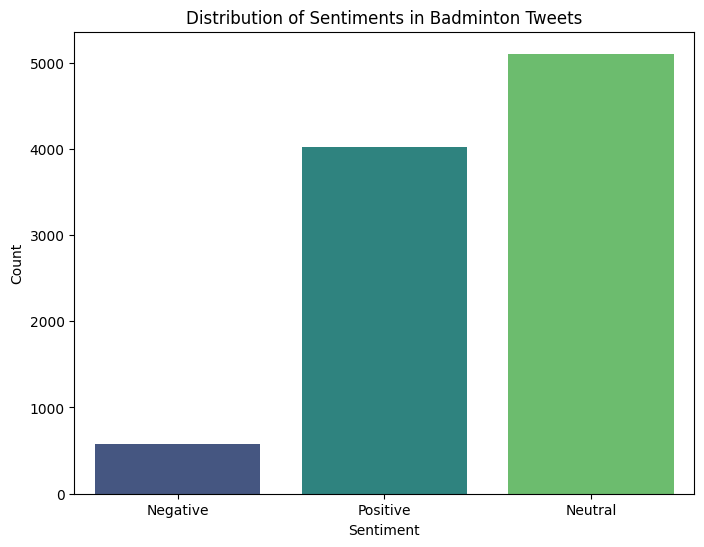

In [16]:
# Plotting the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments in Badminton Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [17]:
# Print sample tweets with sentiments
print("\nSample tweets with sentiments:")
for i in range(min(5, len(df))):
    print(f"\nTweet: {df['text'][i]}")
    print(f"Sentiment: {df['Sentiment'][i]}")


Sample tweets with sentiments:

Tweet: India has won the Thomas cup,  @nikhat_zareen won the gold. @vishy64theking ended up joint 2nd with 0.5 points behind in Super bet. @rpragchess has beat World no.1 Magnus and fighting World No. 2 Ding to clinch the title. Is IPL still a tournament to watch? #India #IndianEra
Sentiment: Negative

Tweet: PM’s interaction with Thomas Cup Champions is amazing. Simple yet inspirational &amp; satisfying. Congratulations #India !!  Every players story is beautiful and PM’s personalised interaction is stunning #ThomasCup @BadmintonIndia @PMOIndia @narendramodi
Sentiment: Positive

Tweet: India won maiden Thomas Cup after defeating 14-time champion Indonesia! Proud Indian Moment🇮🇳
India registered a 3-0 victory over 14-time champions Indonesia. This is India's first-ever Thomas Cup victory in 73 years. 

#ThomasCup #India #ThomasUberCup2022
Sentiment: Positive

Tweet: #India's bunch of exceptionally proficient #Badminton players lifted the #ThomasCup2022 

In [18]:
# counting frequency of word 

def frequent_values(data):
    total = data.count()
    temp_df = pd.DataFrame({'Total': total})
    items = []
    values = []
    cols = data.columns  # Assuming cols is defined somewhere in your code

    for col in cols:
        item = data[col].value_counts().index[0]
        value = data[col].value_counts().values[0]
        items.append(item)
        values.append(value)

    temp_df['Most frequent item'] = items
    temp_df['Count'] = values
    temp_df['Percent from total'] = np.round(values / total * 100, 3)
    return temp_df.T

# Example usage:
# Assuming tweets_data is your DataFrame containing tweets data
frequent_values(df)



,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,inReplyToTweetId,inReplyToUser,mentionedUsers,Sentiment
Total,9704,9704,9704,9680,9704,9704,9704,9704,9704,9704,9704,1174,1174,9704,9704
Most frequent item,1529235395812155392,#ThomasCup,mellikkaa,['ThomasCup'],2022-05-15 09:46:19+00:00,0,0,0,0,0,en,1525774257401131008.0,https://twitter.com/mellikkaa,#ThomasCup,Neutral
Count,1,68,125,4512,12,133,8125,8162,4984,9180,5827,16,100,68,5103
Percent from total,0.01,0.701,1.288,46.612,0.124,1.371,83.728,84.11,51.36,94.6,60.047,1.363,8.518,0.701,52.587


#####  Observation

"#thomascup" is the most frequent words used in the tweets.

There are 5103 tweets with Neutral sentiment.

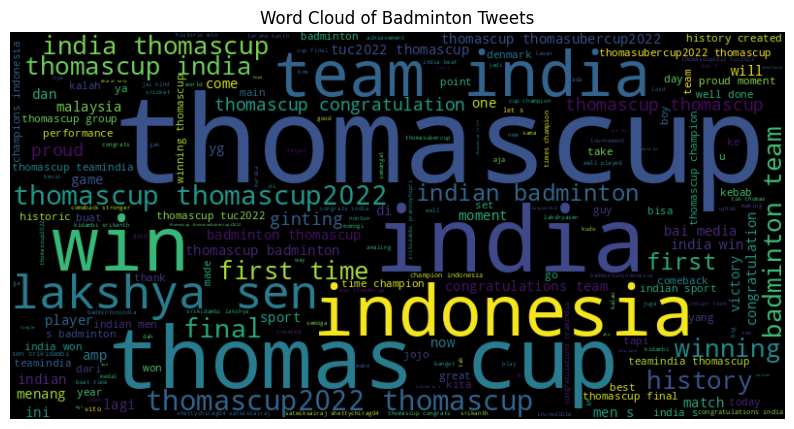

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Preprocess the text data
def preprocess_text(text):
    # Remove URLs, mentions, and special characters
    text = re.sub(r"http\S+|@\S+|[^A-Za-z0-9]+", " ", text)
    return text.lower()

# Apply preprocessing to the tweet text
df['clean_text'] = df['text'].apply(preprocess_text)

# Join all tweet texts into a single string
all_tweets_text = ' '.join(df['clean_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_tweets_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Badminton Tweets')
plt.show()


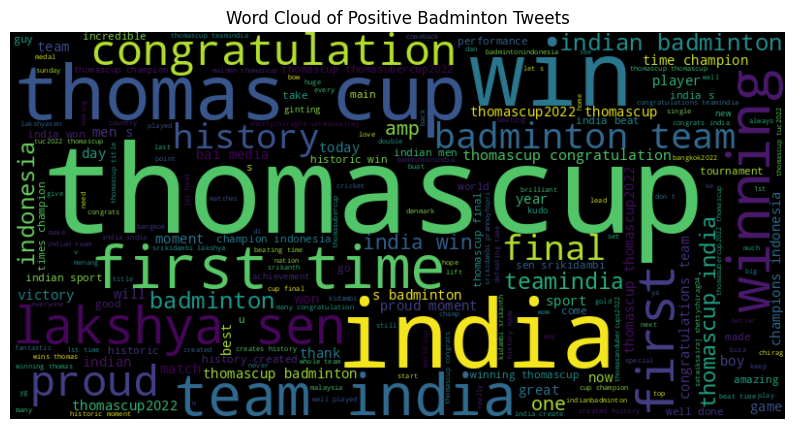

In [20]:
# Preprocess the text data
def preprocess_text(text):
    # Remove URLs, mentions, and special characters
    text = re.sub(r"http\S+|@\S+|[^A-Za-z0-9]+", " ", text)
    return text.lower()

# Filter the DataFrame to include only positive sentiment tweets
positive_tweets_df = df[df['Sentiment'] == 'Positive']

# Apply preprocessing to the tweet text
positive_tweets_df['clean_text'] = positive_tweets_df['text'].apply(preprocess_text)

# Join all tweet texts into a single string
all_tweets_text = ' '.join(positive_tweets_df['clean_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_tweets_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Badminton Tweets')
plt.show()

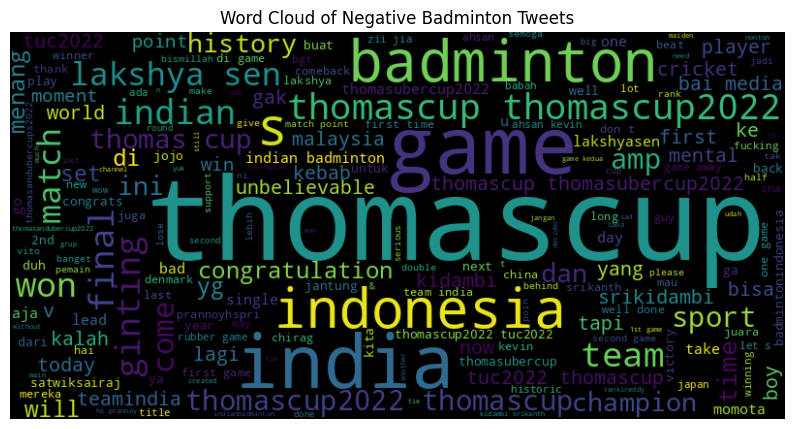

In [21]:
# Preprocess the text data
def preprocess_text(text):
    # Remove URLs, mentions, and special characters
    text = re.sub(r"http\S+|@\S+|[^A-Za-z0-9]+", " ", text)
    return text.lower()

# Filter the DataFrame to include only positive sentiment tweets
Negative_tweets_df = df[df['Sentiment'] == 'Negative']

# Apply preprocessing to the tweet text
Negative_tweets_df['clean_text'] = Negative_tweets_df['text'].apply(preprocess_text)

# Join all tweet texts into a single string
all_tweets_text = ' '.join(Negative_tweets_df['clean_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_tweets_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Badminton Tweets')
plt.show()

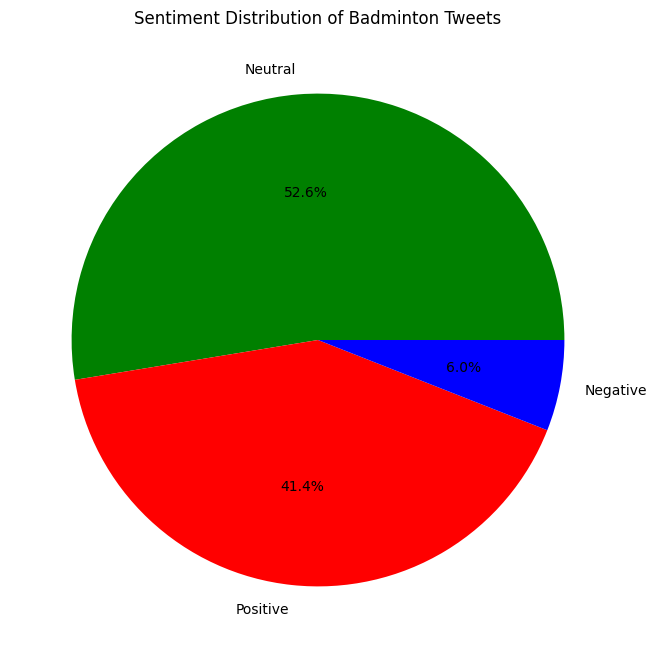

In [22]:
# 1. Pie Chart of Sentiment Distribution
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Badminton Tweets')
plt.show()

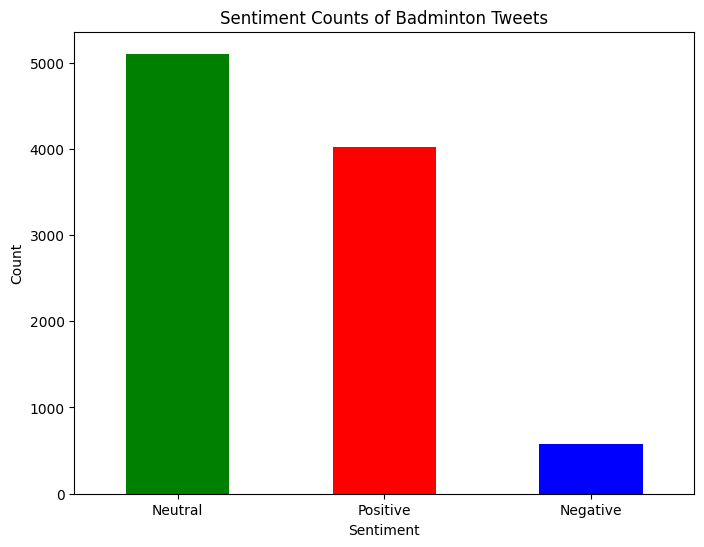

In [23]:
# 2. Bar Chart of Sentiment Counts
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Counts of Badminton Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

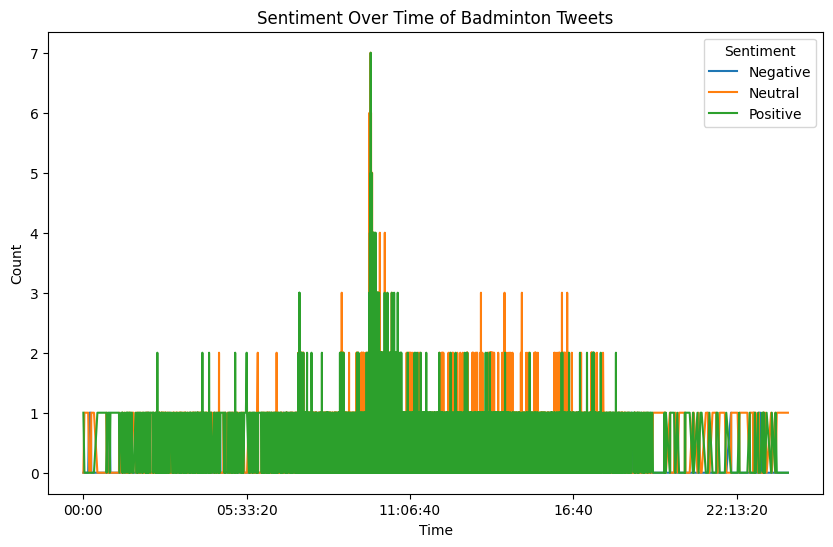

In [24]:
# 3. Time Series Line Plot
df['created_at'] = pd.to_datetime(df['created_at'])
sentiment_counts_over_time = df.groupby([df['created_at'].dt.time, 'Sentiment']).size().unstack(fill_value=0)
sentiment_counts_over_time.plot(kind='line', figsize=(10, 6))
plt.title('Sentiment Over Time of Badminton Tweets')
plt.xlabel('Time')
plt.ylabel('Count')
# plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

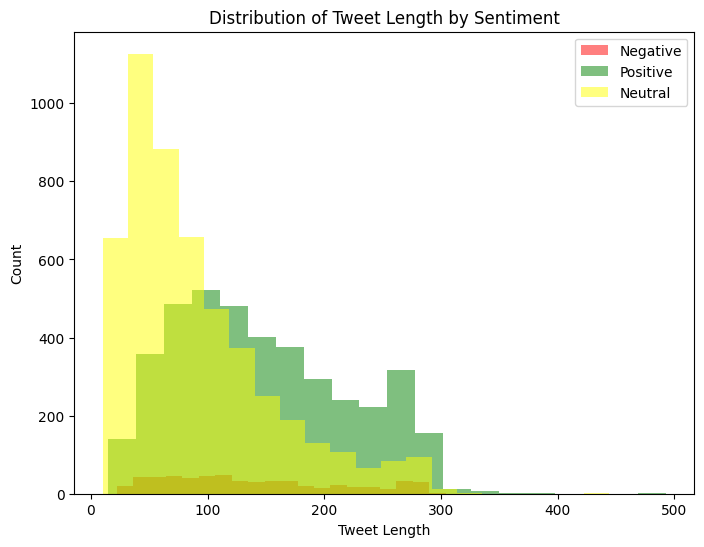

In [25]:
# 4. Histogram of Tweet Length
df['Tweet Length'] = df['text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8, 6))
# Define custom colors for each sentiment category
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'yellow'}

for sentiment in df['Sentiment'].unique():
    plt.hist(df[df['Sentiment'] == sentiment]['Tweet Length'], bins=20, alpha=0.5, label=sentiment , color=colors[sentiment])
plt.title('Distribution of Tweet Length by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.legend()
plt.show()

In [26]:
# Function to compute sentiment score using TextBlob
def compute_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis and compute sentiment scores for each tweet
df['Sentiment Score'] = df['text'].apply(compute_sentiment_score)


In [27]:
df

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,inReplyToTweetId,inReplyToUser,mentionedUsers,Sentiment,clean_text,Tweet Length,Sentiment Score
0,1529235395812155392,"India has won the Thomas cup, @nikhat_zareen ...",themohanty_,"['India', 'IndianEra']",2022-05-24 22:58:24+00:00,43,0,0,3,0,en,NaN,<NA>,"India has won the Thomas cup, @nikhat_zareen ...",Negative,india has won the thomas cup nikhat zareen won...,275,-0.022222
1,1528224948111941633,PM’s interaction with Thomas Cup Champions is ...,goikarpk,"['India', 'ThomasCup']",2022-05-22 04:03:15+00:00,51,0,0,1,0,en,NaN,<NA>,PM’s interaction with Thomas Cup Champions is ...,Positive,pm s interaction with thomas cup champions is ...,254,0.538542
2,1527216966171144193,India won maiden Thomas Cup after defeating 14...,BeShararat,"['ThomasCup', 'India', 'ThomasUberCup2022']",2022-05-19 09:17:53+00:00,4,0,1,1,0,en,NaN,<NA>,India won maiden Thomas Cup after defeating 14...,Positive,india won maiden thomas cup after defeating 14...,256,0.800000
3,1526912239910785024,#India's bunch of exceptionally proficient #Ba...,aaiprayagraj,"['India', 'Badminton', 'ThomasCup2022', 'Bangk...",2022-05-18 13:07:01+00:00,1553,0,1,1,0,en,NaN,<NA>,#India's bunch of exceptionally proficient #Ba...,Positive,india s bunch of exceptionally proficient bad...,279,0.597222
4,1526893293136924672,#India's bunch of exceptionally proficient #Ba...,aaisapairport,"['India', 'Badminton', 'ThomasCup2022', 'Bangk...",2022-05-18 11:51:44+00:00,1192,0,0,0,0,en,NaN,<NA>,#India's bunch of exceptionally proficient #Ba...,Positive,india s bunch of exceptionally proficient bad...,279,0.597222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9699,1522369741914279936,bismillah bulan mei bulan baik untuk indonesia...,bellydupling,<NA>,2022-05-06 00:16:45+00:00,267,0,0,0,0,in,NaN,<NA>,bismillah bulan mei bulan baik untuk indonesia...,Neutral,bismillah bulan mei bulan baik untuk indonesia...,218,0.000000
9700,1509849585992159239,@BAI_Media @bwfmedia @Media_SAI @IndiaSports @...,atul_tn,<NA>,2022-04-01 11:06:07+00:00,40,0,0,4,0,en,1.509823e+18,https://twitter.com/BAI_Media,@BAI_Media @bwfmedia @Media_SAI @IndiaSports @...,Positive,bwfmedia media sai indiasports badmintonthai...,239,0.275000
9701,1505009552281903106,"@badminton__fess Asian games, Sea games, turma...",Nda1426,<NA>,2022-03-19 02:33:33+00:00,97,0,0,0,0,in,1.505007e+18,https://twitter.com/badminton__fess,"@badminton__fess Asian games, Sea games, turma...",Neutral,asian games sea games turmamen beregu kek th...,100,0.000000
9702,1485192823679119361,Blf! Guys ada yg punya foto di zi jian/wang ch...,badminton__fess,<NA>,2022-01-23 10:08:57+00:00,29259,0,0,8,0,in,NaN,<NA>,Blf! Guys ada yg punya foto di zi jian/wang ch...,Neutral,blf guys ada yg punya foto di zi jian wang cha...,265,0.000000


<Figure size 800x600 with 0 Axes>

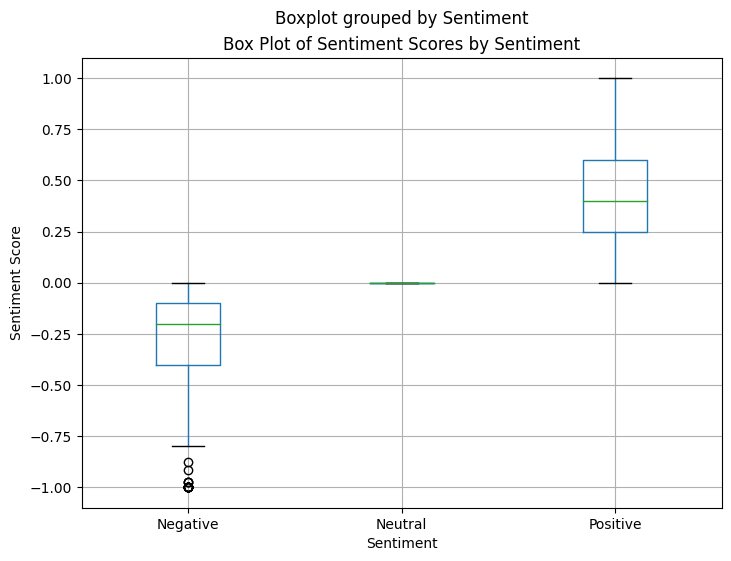

In [28]:
# 6. Box Plot of Sentiment Scores
plt.figure(figsize=(8, 6))
df.boxplot(column='Sentiment Score', by='Sentiment', figsize=(8, 6))
plt.title('Box Plot of Sentiment Scores by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.show()

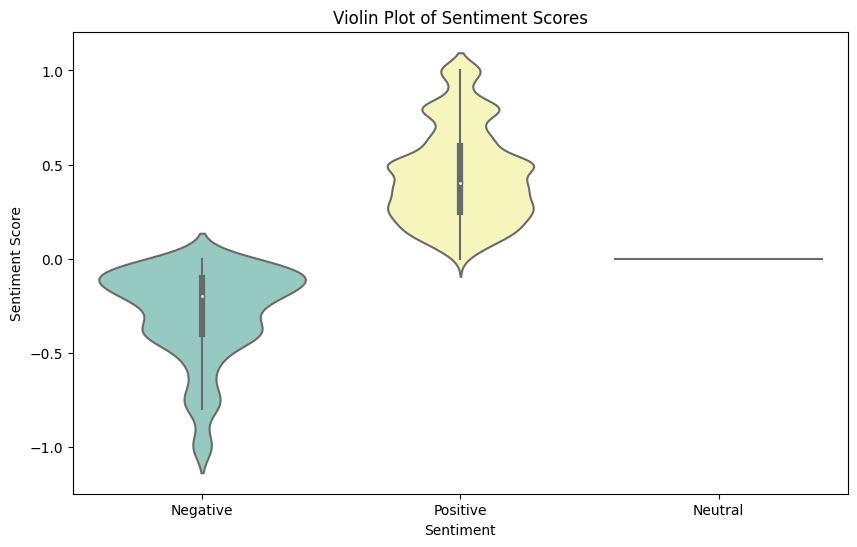

In [29]:
# 5. Violin Plot of Sentiment Scores
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Sentiment', y='Sentiment Score', palette='Set3')
plt.title('Violin Plot of Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.show()

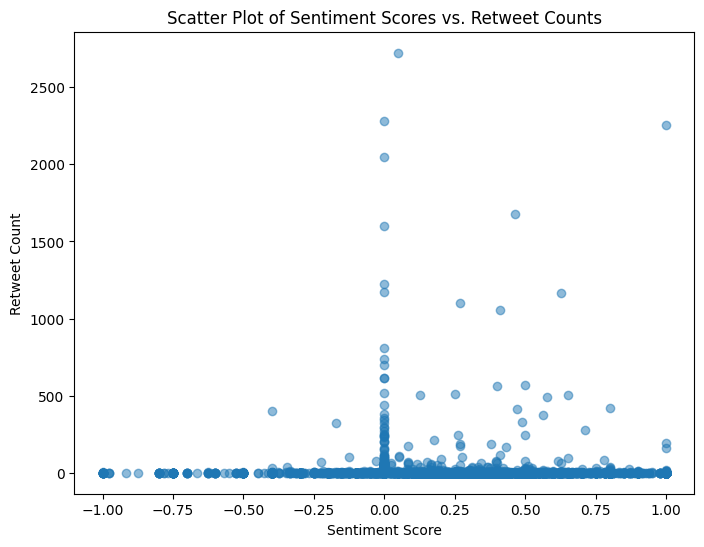

In [30]:
# 8. Scatter Plot of Sentiment Scores vs. Retweet Counts
plt.figure(figsize=(8, 6))
plt.scatter(df['Sentiment Score'], df['retweetcount'], alpha=0.5   )
plt.title('Scatter Plot of Sentiment Scores vs. Retweet Counts')
plt.xlabel('Sentiment Score')
plt.ylabel('Retweet Count')
plt.show()